<H1><CENTER> Machine Learning Lab - Exercise Sheet 6 <br /></CENTER></H1>
<H2><CENTER> Author: Sebastian Pineda Arango  <br />
ID: 246098<br />
Universität Hildesheim - Data Analytics Master </CENTER></H2>

<img src="https://www.uni-hildesheim.de/typo3conf/ext/unihildesheim/Resources/Public/Images/logo-uni.svgz" width="100">


### Exercise Sheet 6

In this notebook, we are going to work with two different datasets. The first dataset is a synthetic dataset and the second one is from Wine Quality (http://archive.ics.uci.edu/ml/datasets/Wine+Quality).

We import libreries and initialize a matrix $x$ $\epsilon$ $R^{(100\times1)}$ with $\mu=1$ and $\sigma=0.05$.


In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline 

#initialize matrix
x = np.random.uniform(low=-10, high=10, size=(100,1))

Text(0.5,1,'Dataset 1: Value distribution')

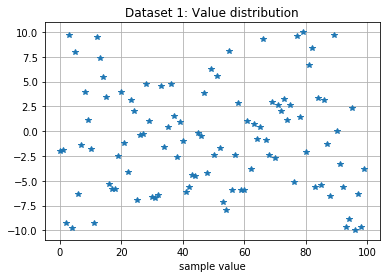

In [4]:
plt.plot(x,'*')
plt.grid()
plt.xlabel("sample value")
plt.title("Dataset 1: Value distribution")

Now we generate a target $y$ $\epsilon$ $R^{(100\times1)}$ using $y=1.3x^2+4.8x+8+\phi$, where $\phi$ $\epsilon$ $R^{100\times1}$ is randomly initialized.


In [148]:
phi = np.random.normal(1, 20,(100,1))
y = 1.3*x**2+4.8*x+8+phi

dataset1 = pd.DataFrame({'x':list(x),
                         'y':list(y)})

Text(0,0.5,'y')

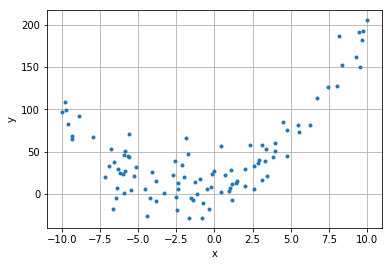

In [149]:
plt.plot(x,y, '.')
plt.grid()
plt.xlabel("x")
plt.ylabel("y")

Now, the second dataset is loaded (dataset2), which is the wine dataset.

In [42]:
#reading red wine dataset
dataset2 = pd.read_csv("winequality-red.csv", sep=";")

print("Size of dataset2 before dropping NA:", dataset2.shape)
dataset2 = dataset2.dropna()
dataset2.head()

Size of dataset2 before dropping NA: (1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Preprocessing data-set

For the preprocessing, we will make some exploratory analysis and also see correlations between the variables.



In [43]:
dataset2.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


The describe method gives us important insight from data:

* There are aboyt 1600 samples
* Mean and median of variables are relative close, except for total sulfur dioxide (this variable may have outlier values).
* All variables are positive.
* Free sulfur dioxide also have a very high maximum value. This could indicate also the existence of outliers.

In [44]:
dataset2.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


From the correlation diagrams, it is seen that the variables _alcohol_ has a very important correlation (about 0.476). So this predictor could turn to be also very important at prediction time.

### Train-test split

The dataset is now partitioned in train and test data samples with proportion: %80 (train set) and %20 (test set).

In [45]:
def split_train_test(data, train_pct, features, target):
    
    '''This functions divides "data"  in train and test set.
    The percentage give to the train data is determined by "train_pct".
    The "features" argument determine a list of features to consider.
    The "target" arugment indicates the the variable to predict.'''
    
    #getting the total number of training samples
    data_size = data.shape[0]
    train_size = int(train_pct*data_size)

    #shuffling indexes to separate train and test randoming
    idx = np.arange(0,data_size)
    np.random.shuffle(idx)

    #creating test indexes
    train_idx = idx[:train_size]

    #creating test indexes
    test_idx = idx[train_size:]

    #selecting train data (features)
    X_train = data[features].iloc[train_idx,]

    #selecting train data (target)
    y_train = data[target].iloc[train_idx,]

    #selecting test data (features)
    X_test = data[features].iloc[test_idx,]

    #selecting test data (target)
    y_test = data[target].iloc[test_idx,]
    
    #stacking a column of ones to the training and test set
    X_train = np.hstack((X_train, np.ones((X_train.shape[0],1))))
    X_test = np.hstack((X_test, np.ones((X_test.shape[0],1))))

    return X_train, y_train, X_test, y_test

In [47]:
#using split_train_test function to split the dataset1
features2 = list(dataset2.columns) #list of features
target2 = 'quality'
features2.remove('quality')
X_train2, y_train2, X_test2, y_test2 = split_train_test(dataset2, 0.8, features2, target2)

print("Verifying dataset sizes ...")
print("Size train set for dataset1:", X_train2.shape)
print("Size test set for dataset1:", X_test2.shape)


Verifying dataset sizes ...
Size train set for dataset1: (1279, 12)
Size test set for dataset1: (320, 12)


### Data Normalization

We want to normalize each feature, applying following equation:

$x_{nomalized} = \frac{(x - mean(x))}{sd(x)}$

Where $sd(x)$ is the standard deviation of the feature.

We must also take into account that the mean and standard deviation parameters are only calculated using the train set. Therefore, they must be saved so that we can also apply them on test set. Hence, we consider to use a class, that perform the parameter fitting (finding the mean and standard deviation) and that applies the transformation on a given set. This is very similar to the way scikit-learn works.


In [48]:
class Normalizer:
    
    '''Class to perform normalization of train and test set.'''
    
    def __init__(self):
        
        '''Initializing lists to save the parameters'''
        
        self.means = []
        self.stds = []
        
    def fit ( self, X):
        
        '''This method fits the parameters (find the mean and standard deviation) of all 
        the features (columns) of X'''
        
        for i in range(X.shape[1]):
            self.means.append(np.mean(X[:,i]))
            self.stds.append(np.std(X[:,i]))
        self.n_columns = X.shape[1]
        return 0
    
    def transform(self, X):
        
        '''This method transforms X, applying a normalization on X given the mean and standard
        deviation saved in the this class.'''
        
        if(X.shape[1]!=self.n_columns):
            
            print("Problem with data size")           
            return 0
        
        for i in range(X.shape[1]):
            if(self.stds[i]!=0):
                X[:,i] = (X[:,i]-self.means[i])/self.stds[i]
        
        return X


In [49]:
#normalizing first dataset
n_train2 = X_train2.shape[0]
norm2 = Normalizer()
norm2.fit(X_train2) #fitting parameters
X_train_trans2 = norm2.transform(X_train2) #applying normalization
X_test_trans2 = norm2.transform(X_test2) #applying normalization

### GLM

We train three different models using scikit-learn. For training, the Stochastic Gradient Descent algorithm is used. The three algorithms trained are:

* Ordinary Least Squares

$Cost =  ||y-X\beta||^2_2 $

* Ridge Regression

$Cost =  ||y-X\beta||^2_2 + \lambda||\beta||_2$

* LASSO

$Cost =  ||y-X\beta||^2_2 + \lambda||\beta||_1$

Where we see that the main difference etween Ridge and LASSO is that the first one uses the L2 norm for regularization, while the second one uses the L1 norm.

For each algorithm, we pick three values for the hyperparameter. In OLS, our vayring hyperparameter will be the learning rate. On the other hand, for Ridge and Lasso, we vary lambda (alpha in scikit-learn function parameter) which is the weight for the regularization term.

In [88]:
#Importing libraries
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import make_scorer as mk_sc
learn_rates = [0.0001, 0.001, 0.01, 0.02]
alphas = [0.0, 0.001, 0.01, 0.02]

#Initialization of list of train errors
train_error_OLS = []
train_error_ridge = []
train_error_lasso = []

#Initialization of list of test errors
test_error_OLS = []
test_error_ridge = []
test_error_lasso = []

#Initializations of parameters mean - used to compare methods
parameters_mean_OLS = []
parameters_mean_ridge = []
parameters_mean_lasso = []

X_train2 = X_train_trans2
X_test2 = X_test_trans2

#Training Ordinary Least squares regressors for different learning rates
for learning_rate in learn_rates:
    
    #Defining the object
    OLS = SGDRegressor(penalty=None,
                          learning_rate = "constant",
                          eta0=learning_rate)
    
    #Fitting the data
    OLS.fit(X_train2, y_train2)

    train_error_OLS.append( mse(y_train2, OLS.predict(X_train2)))
    test_error_OLS.append( mse(y_test2, OLS.predict(X_test2)))
    parameters_mean_OLS.append(np.mean(np.abs(OLS.coef_)))

#Training different Lasso and Ridge regression varying L1 and L2
for alpha in alphas:

    #Defining the objects
    Lasso = SGDRegressor(penalty="l1",
                          alpha=alpha)
    Ridge = SGDRegressor(penalty="l2",
                          alpha=alpha)
    
    #Fitting the model to the data
    Lasso.fit(X_train2, y_train2)
    Ridge.fit(X_train2, y_train2)
    
    #Saving errors
    train_error_lasso.append( mse(y_train2, Lasso.predict(X_train2)))
    train_error_ridge.append( mse(y_train2, Ridge.predict(X_train2)))

    test_error_lasso.append( mse(y_test2, Lasso.predict(X_test2)))
    test_error_ridge.append( mse(y_test2, Ridge.predict(X_test2)))

    parameters_mean_ridge.append(np.mean(np.abs(Lasso.coef_)))
    parameters_mean_lasso.append(np.mean(np.abs(Ridge.coef_)))

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


I the following plot, it is showed that as the learning rate increases, the lower is the MSE (Mean Squred Error) achieved. However, if the learning rate increases a lot, it may diverge.

Text(0.5,1,'OLS')

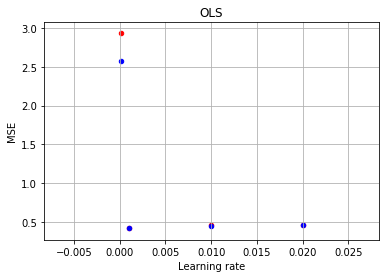

In [89]:

plt.scatter( learn_rates, np.array(train_error_OLS), c="r",s=20)
plt.scatter(learn_rates, np.array(test_error_OLS), c="b",s=20)
plt.grid()
plt.xlabel("Learning rate")
plt.ylabel("MSE")
plt.title("OLS")

In the following plot is showed that it is possible to achieve a slightly lower MSE, with a penalizaty term different from zero in Ridge regression. 

Text(0.5,1,'Ridge')

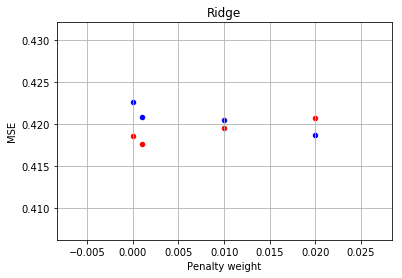

In [90]:
plt.scatter(alphas, np.array(train_error_ridge), c="r",s=20)
plt.scatter(alphas, np.array(test_error_ridge), c="b",s=20)
plt.grid()
plt.xlabel("Penalty weight")
plt.ylabel("MSE")
plt.title("Ridge")

With LASSO, there is only a little improvment using a short penalty weight. However, if the penalty term increases a lot, the MSE also does. This can be seen in the following plot

Text(0.5,1,'LASSO')

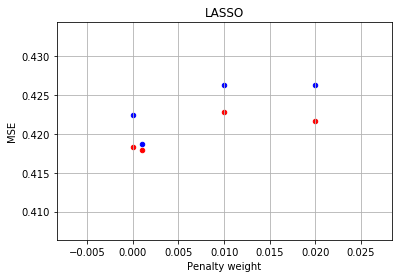

In [91]:
plt.scatter(alphas, np.array(train_error_lasso), c="r",s=20)
plt.scatter(alphas, np.array(test_error_lasso), c="b",s=20)
plt.grid()
plt.xlabel("Penalty weight")
plt.ylabel("MSE")
plt.title("LASSO")

The penalty term avoids overfitting, since it permits that the train and test errors get closer, while mainting these errors relatively low. If we had more complex models, these effect could be even more noticeable. 

The greater the penalty term, the lower the weights tend to be. This can be seen in the following table where we show the mean of the parameters. As it is shown, for large values for penalty term (alpha), the mean of the parameters (coefficients of the regression) is low. We can also see that varying the learning rate for OLS does not have a noticeable effect over the mean of the parameters.

In [92]:
df = pd.DataFrame( {'learning rate': learn_rates,
                    'alpha': alphas,
                    'parameters mean OLS': parameters_mean_OLS,
                    'parameters mean Ridge': parameters_mean_ridge,
                    'parameters mean Lasso': parameters_mean_lasso})
df[["alpha", "learning rate", "parameters mean OLS", "parameters mean Ridge", "parameters mean Lasso"]]

,alpha,learning rate,parameters mean OLS,parameters mean Ridge,parameters mean Lasso
0,0.000,0.0001,0.223311,0.329279,0.332300
1,0.001,0.0010,0.325122,0.325128,0.330295
2,0.010,0.0100,0.323299,0.304710,0.313769
3,0.020,0.0200,0.362843,0.293422,0.300653


Now, we perform the selection of the best set of hyperparameters using _GridSearchCv_. We plot the results and we see that the best model for OLS is the one having learning rate equals to 0.0001. With GridSeachCV, the best algorithm is selected using $R^2$ (coefficient of determination) measure, therefore the idea is to maximize this metric.

Best model:
SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0001,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', max_iter=1000, n_iter=None, penalty=None,
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)


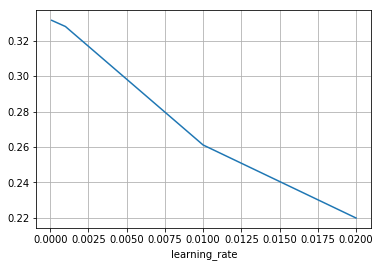

In [124]:
from sklearn.model_selection import GridSearchCV
parameters = { 'eta0' : [0.0001, 0.001, 0.01, 0.02]} #learning rate}

#creating the object regressor
OLS = SGDRegressor(penalty=None,
                learning_rate = "constant",
                max_iter = 1000)

#finding the est hyperparameter
OLS_ = GridSearchCV(OLS, parameters, cv=10)
OLS_.fit(X_train2, y_train2)

#getting the reuslts to plot
x_axis = [i['eta0'] for i in OLS_.cv_results_['params']]
y_axis = OLS_.cv_results_['mean_test_score']

plt.plot(x_axis, y_axis)
plt.grid()
plt.xlabel("learning_rate")

best_model_OLS = OLS_.best_estimator_
print("Best model:")
print(best_model_OLS)

We also tune the hyperparameter for the penalty weight for Ridge. Here we obtain that the best model is the one having alpha = 0.02. We do it using the function _GridSearchCV_ which find the ebst set of hyperparameters using grid search and cross validation.

Best model:
SGDRegressor(alpha=0.02, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', max_iter=1000, n_iter=None, penalty='l1',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)


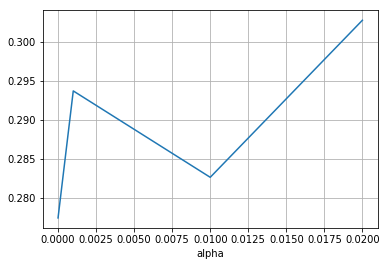

In [125]:
parameters = { 'alpha' : [0.0, 0.001, 0.01, 0.02]}

#creating the object regression
Lasso = SGDRegressor(penalty="l1",
                learning_rate = "constant",
                max_iter = 1000)

#creating a grid search object
Lasso_ = GridSearchCV(Lasso, parameters, cv=10)

#fitting the regressor (iterating over hyperparamters with grid search)
Lasso_.fit(X_train2, y_train2)

#getting the results to plot
x_axis = [i['alpha'] for i in Lasso_.cv_results_['params']]
x_axis
y_axis = Lasso_.cv_results_['mean_test_score']

plt.plot(x_axis, y_axis)
plt.grid()
plt.xlabel("alpha")

best_model_lasso = Lasso_.best_estimator_
print("Best model:")
print(best_model_lasso)

We also tune the hyperparameter for the penalty weight for Lasso. Here we obtain that the best model is the one having alpha = 0.02. We do it using the function _GridSearchCV_ which find the ebst set of hyperparameters using grid search and cross validation.

Best model:
SGDRegressor(alpha=0.02, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', max_iter=1000, n_iter=None, penalty='l1',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)


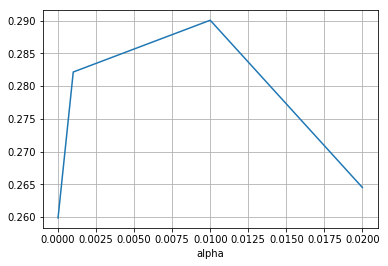

In [143]:
parameters = { 'alpha':  [0.0, 0.001, 0.01, 0.02]}

#creating the object regression
Ridge = SGDRegressor(penalty="l2",
                learning_rate = "constant",
                max_iter = 1000)

#creating a grid search object
Ridge_ = GridSearchCV(Ridge, parameters, cv=10)

#fitting the regressor (iterating over hyperparamters with grid search)
Ridge_.fit(X_train2, y_train2)

#getting the results to plot
x_axis = [i['alpha'] for i in Ridge_.cv_results_['params']]
x_axis
y_axis = Ridge_.cv_results_['mean_test_score']

plt.plot(x_axis, y_axis)
plt.grid()
plt.xlabel("alpha")

best_model_ridge = Ridge_.best_estimator_
print("Best model:")
print(best_model_lasso)

We want also find out the variability of the results. For that, we use cross validation over 10 folds. We notice that the three models have a very high variability on the results after training with the best subset of hyperparameters. This could mean that the results of the best model may vary on the final actual performance on new data. In fact, we can see that the performance on the unseen test set is close to the deployed mean. We also realize that LASSO and RIDGE performs better than OLS.

Metric on test set:  0.339631039903


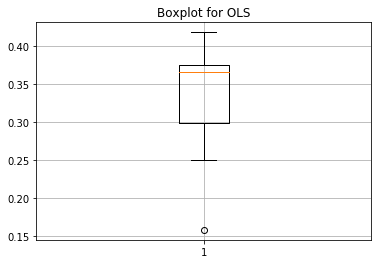

In [139]:
from sklearn.model_selection import cross_val_score

metrics_OLS = cross_val_score(best_model_OLS, X_train2, y_train2, cv=10)
plt.boxplot(metrics_OLS)
plt.grid()
plt.title("Boxplot for OLS")

best_model_OLS.fit(X_train2, y_train2)
print("Metric on test set: ", best_model_OLS.score(X_test2, np.array(y_test2) ))

Metric on test set:  0.318953509127


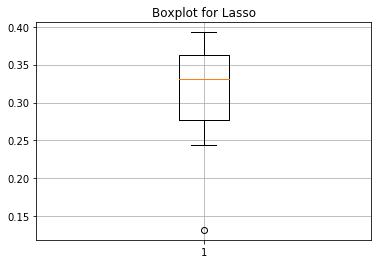

In [140]:
metrics_lasso = cross_val_score(best_model_lasso, X_train2, y_train2, cv=10)
plt.boxplot(metrics_lasso)
plt.grid()
plt.title("Boxplot for Lasso")

best_model_lasso.fit(X_train2, y_train2)
print("Metric on test set: ", best_model_lasso.score(X_test2, np.array(y_test2) ))

Metric on test set:  0.275721532872


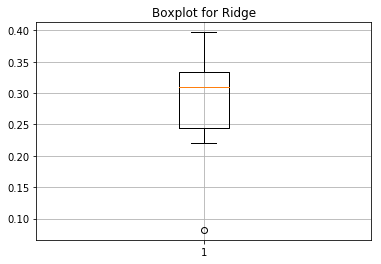

In [142]:
metrics_ridge = cross_val_score(best_model_ridge, X_train2, y_train2, cv=10)
plt.boxplot(metrics_ridge)
plt.grid()
plt.title("Boxplot for Ridge")

best_model_ridge.fit(X_train2, y_train2)
print("Metric on test set: ", best_model_ridge.score(X_test2, np.array(y_test2) ))

### Polynomial regression

We experiment now the effect of the regulairization on a dataset with nose. In the first part of the notebook we have create a dataset with nose and we want to fit different order polynomials. We use polynomials of order: 1, 2, 7, 10, 16, 25.

We use the data with noise as train data and we create a test data using a set of values equally separated between -15 and 15.

In [145]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = []
poly_features.append(PolynomialFeatures(1))
poly_features.append(PolynomialFeatures(2))
poly_features.append(PolynomialFeatures(7))
poly_features.append(PolynomialFeatures(10))
poly_features.append(PolynomialFeatures(16))
poly_features.append(PolynomialFeatures(25))
poly_features.reverse()

X_test_samples = np.arange(-15,15,0.001)

datasets_train = [poly.fit_transform(dataset1.x.values.reshape(-1,1))  for poly in poly_features]
datasets_test = [poly.fit_transform(X_test_samples.reshape(-1,1)) for poly in poly_features]

datasets_test[0].shape

(30000, 26)

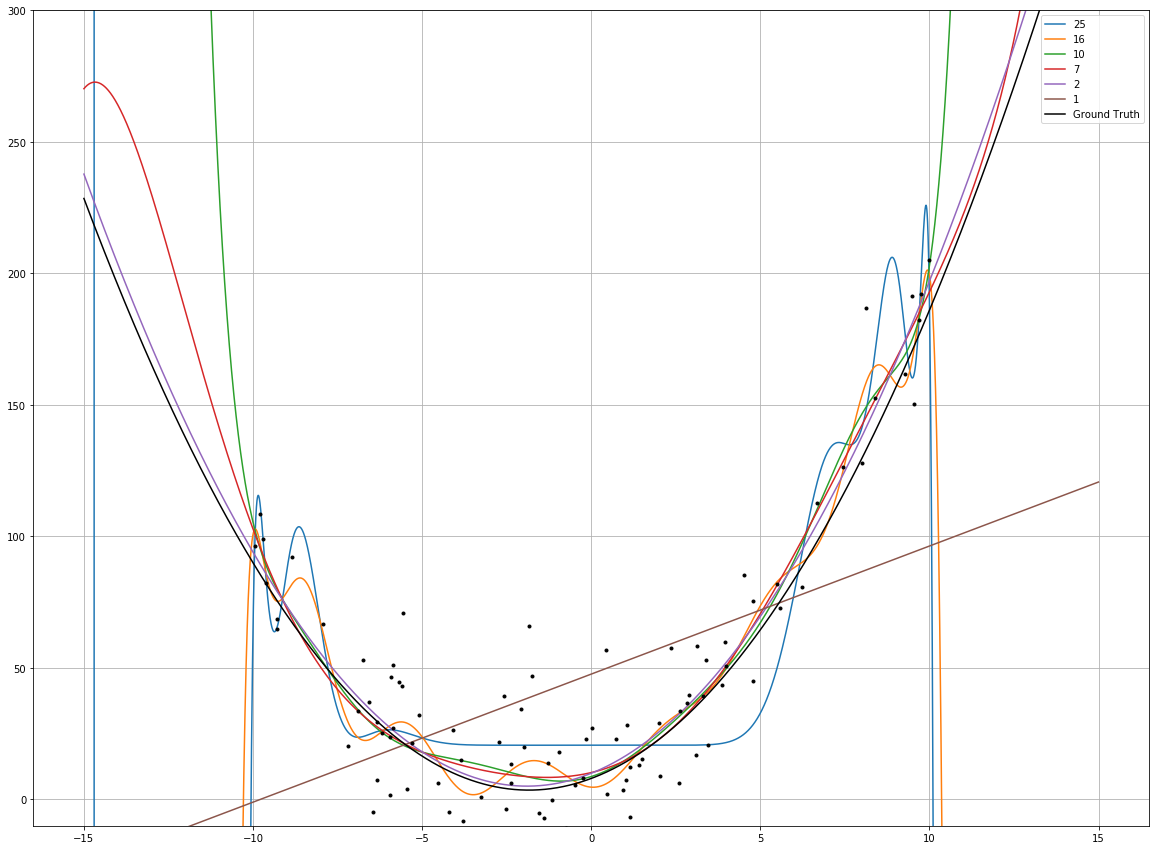

In [158]:
from sklearn.linear_model import LinearRegression

#label with noise
y = dataset1.y

#tru values for the label
y_true = 1.3*X_test_samples**2+4.8*X_test_samples+8

fix, ax = plt.subplots(figsize=(20,15))

#ploting using different polynomial orders
for X_train, X_test in zip(datasets_train, datasets_test):
    #fitting regressor
    reg = LinearRegression().fit(X_train,y)
    
    #prediction values
    y_pred_test = reg.predict(X_test)
    ax.plot(X_test_samples, y_pred_test)
    plt.ylim(-10,300)
ax.plot(X_test_samples, y_true, c="black")
ax.plot(x, y, '.', c="black")
ax.grid()
ax.legend(("25", "16", "10", "7", "2", "1", "Ground Truth"))
    



As we can see in the last plot, the polynomials of high degree have overfitting and we can see that the nose in samples, influecen a lot the final results for those polynomials. The polynomial of grade 1 suffers underfitting, it is a straight line that does not fit the data very well. 

We now test a high degree polynomial (25) and see the effect of regularizing it.

C:\Users\User\Anaconda3\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 3.8460693797403033e-19
  ' condition number: {}'.format(rcond), RuntimeWarning)
C:\Users\User\Anaconda3\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 1.3133269939056866e-18
  ' condition number: {}'.format(rcond), RuntimeWarning)
C:\Users\User\Anaconda3\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 6.503993827112883e-19
  ' condition number: {}'.format(rcond), RuntimeWarning)


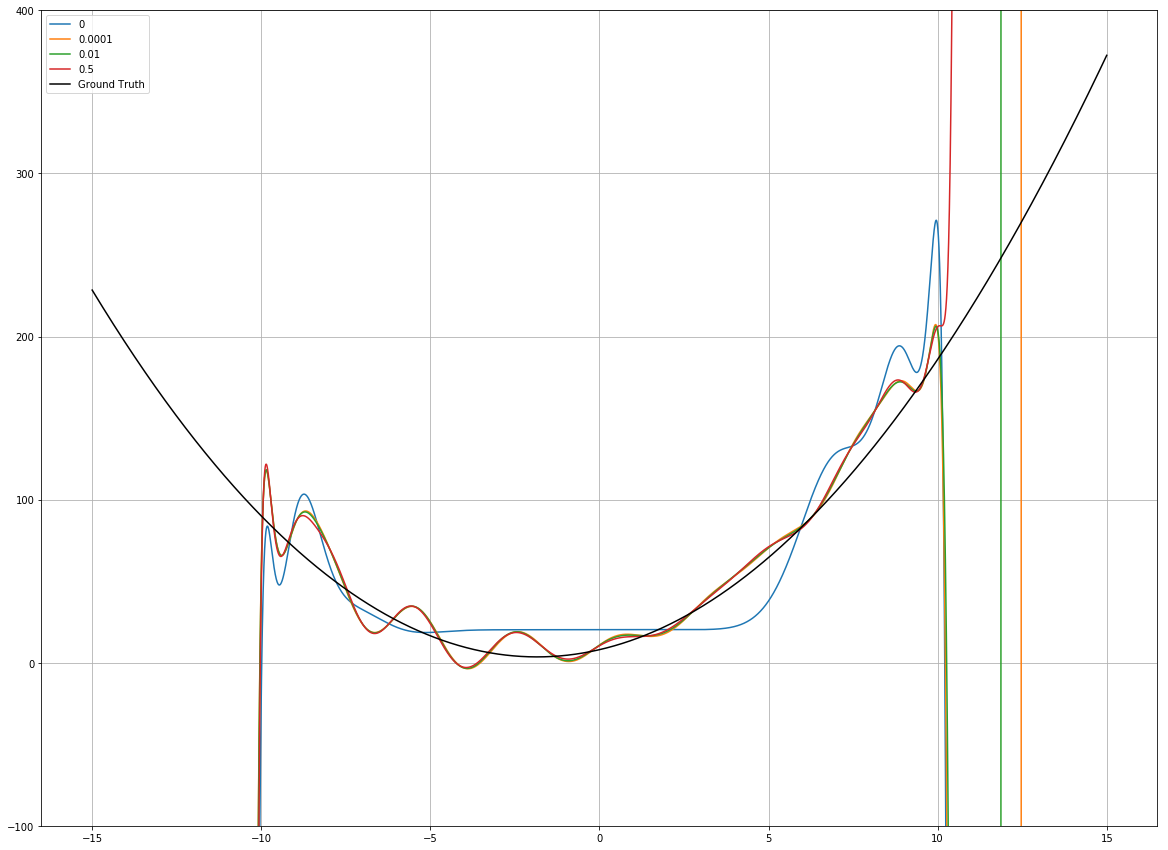

In [162]:
from sklearn.linear_model import Ridge

X_train = PolynomialFeatures(25).fit_transform(dataset1.x.values.reshape(-1,1))
X_test = PolynomialFeatures(25).fit_transform(X_test_samples.reshape(-1,1))
alphas = [0, 1e-4, 1e-2, 0.5]

fix, ax = plt.subplots(figsize=(20,15))

for alpha in alphas:
    #fitting regressor
    RidgeReg = Ridge(     alpha=alpha,
                          max_iter=1000).fit(X_train, y)
    #predicting values for test data
    y_pred_test = RidgeReg.predict(X_test)
    
    ax.plot(X_test_samples, y_pred_test)
    plt.ylim(-100,400)

ax.plot(X_test_samples, y_true, c="black")
ax.legend(alphas+["Ground Truth"])
ax.grid()

As we can see, polynomials with no regularization (alpha=0, blue line) has a prediction line showing high overfitting. On the other hand, the regularization decrease overfitting a little bit, even though the grade of the polynomial is very high and therefore it is a complex model (more prone to overfitting).